# Prolate spheroidal tip
## Field emission

In [8]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
import seaborn as sns
sns.set_theme()

import os.path as path
import f90nml

# Path to simulations
filepath = './'

## Read input parameters

In [9]:
# input file
filename_input = path.join(filepath, 'input')

# Read the input file for parameters used
input_nml = f90nml.read(filename_input)

# Read the init.bin file for system parameters
#epsilon_r, m_eeff, m_heff, length_scale, time_scale, vel_scale, cur_scale, MAX_PARTICLES, MAX_EMITTERS, MAX_SECTIONS, MAX_LIFE_TIME
dt_sys = np.dtype([('epsilon_r', np.float64), \
                   ('m_eeff', np.float64), \
                   ('m_heff', np.float64), \
                   ('length_scale', np.float64), \
                   ('time_scale', np.float64), \
                   ('vel_scale', np.float64), \
                   ('cur_scale', np.float64), \
                   ('MAX_PARTICLES', np.int32), \
                   ('MAX_EMITTERS', np.int32), \
                   ('MAX_SECTIONS', np.int32), \
                   ('MAX_LIFE_TIME', np.int32) ])
filename_initbin = path.join(filepath, 'out/init.bin')
data_sys = np.memmap(filename_initbin, dtype=dt_sys, mode='r', order='F')
input_nml['system'] = dict(zip(data_sys.dtype.names, data_sys[0]))

# Print input parameters
print(input_nml)

&input
    v_s = 750.0
    box_dim = 0.0, 0.0, 1000.0
    time_step = 2.5e-05
    steps = 2500
    emission_mode = 3
    nremit = 1
    image_charge = .true.
    n_ic_max = 1
    collisions = .false.
    emitters_dim(1:3,1) = 1000.0, 250.0, 500.0
    emitters_pos(1:3,1) = 0.0, 0.0, 0.0
    emitters_type(1) = 1
    emitters_delay(1) = 0
/

&system
    max_emitters = 1
    max_life_time = 1000
    max_particles = 500000
    max_sections = 9216
    cur_scale = 1.0
    epsilon_r = 1.0
    length_scale = 1e-09
    m_eeff = 1.0
    m_heff = 1.0
    time_scale = 1e-12
    vel_scale = 1000.0000000000001
/


### Emission information

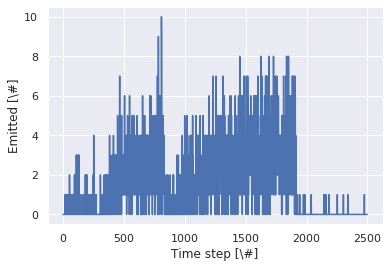

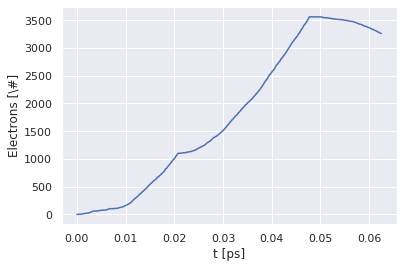

In [10]:
# Emission file
filename_emit = path.join(filepath, 'out/emitted.dt')

# Read data into a pandas dataframe
df_emit = pd.read_csv(filepath_or_buffer=filename_emit, index_col=1, delim_whitespace=True, \
                      header=None, names=['time', 'step', 'nrEmit', 'nrElec', 'nrEmit1'])

# Plot number of particles emitted per time step
plt.plot(df_emit['nrEmit'].to_numpy())
plt.xlabel('Time step [\#]')
plt.ylabel('Emitted [\#]')
plt.show()

# Plot total number of particles in the system as a function of time
plt.plot(df_emit['time'].to_numpy(), df_emit['nrElec'].to_numpy())
plt.xlabel('t [ps]')
plt.ylabel('Electrons [\#]')
plt.show()

## Density

### Plot emission density

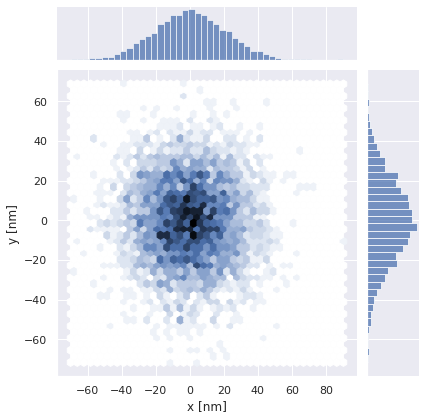

In [11]:
filename_emit_den = path.join(filepath, 'out/density_emit.bin')

# Binary file layout
# float64 (double precision numbers)
# int32 (32bit integers)
dt_emit_type = np.dtype([('x', np.float64), ('y', np.float64), ('emit', np.int32), ('sec', np.int32), ('id', np.int32)])

# Memory map the file
# mode=r (Read only)
# order=F (Fortran style array)
data_mem_emit = np.memmap(filename_emit_den, dtype=dt_emit_type, mode='r', order='F')
    
# Read the data into dataframe
df_emit = pd.DataFrame.from_records(data=data_mem_emit, columns=data_mem_emit.dtype.names)

g = sns.jointplot(data=df_emit, x="x", y="y", kind='hex')
g.set_axis_labels("x [nm]", "y [nm]")

### Plot absorption density

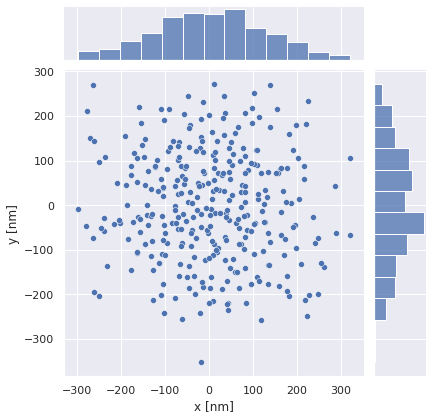

In [12]:
filename_abs = path.join(filepath, 'out/density_absorb_top.bin')

# Binary file layout
# float64 (double precision numbers)
# int32 (32bit integers)
dt_abs_type = np.dtype([('x', np.float64), ('y', np.float64), ('vx', np.float64), ('vy', np.float64), ('vz', np.float64), ('emit', np.int32), ('sec', np.int32),  ('id', np.int32)])

# Memory map the file
# mode=r (Read only)
# order=F (Fortran style array)
data_mem_abs = np.memmap(filename_abs, dtype=dt_abs_type, mode='r', order='F')
    
# Read the data into dataframe
df_abs = pd.DataFrame.from_records(data=data_mem_abs, columns=data_mem_abs.dtype.names)

h = sns.jointplot(data=df_abs, x="x", y="y")
h.set_axis_labels("x [nm]", "y [nm]")